# Superdense Coding

*Superdense coding* is a coding mechanism that takes advantage of *quantum entanglement* to compress ***classical information*** by trasmitting a quantum system. It is somehow the opposite of *quantum teleportation*, where quantum information is received without sending a quantum system in the usual sense.

From classical computing, we know that with *n* bits we can have $2^n$ units of information, i.e messages. Thus, with two bits we have the pairs '00', '01', '10' and '11', whose decimal representations are the numbers '0', '1', '2' and '3' respectively. In classical communication protocols, we would encode these decimal numbers in their binary form and send the information through some channel, using methods as *fixed-length coding* or *Huffman coding*, dependent on the information we own about the source symbols.

With superdense coding, we can encode two classical bits by using only one qubit by leveraging the exponential growth of the domain dimensions in quantum mechanics and of course, quantum entanglement. Let us demonstrate how this works by using ***qiskit*** in *Python*.

First, let us import all necessary objects and methods for quantum circuits using ***qiskit*** library.

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

Assume we have two parties, Alice and Bob, who represent the transmitter and the receiver respectively. The first step is to share an entangled pair of particles as in quantum teleportation protocol. To create the entangled pair between Alice and Bob, we use the following function with two qubits (*a*, *b*) and a quantum circuit (*qc*) as inputs. For more information about entanglement creation, see '*01_Quantum_Teleportation*' notebook.

In [2]:
def entangle(a, b, qc):
    qc.h(a)
    qc.cx(a, b)

For the sake of brevity, we assume that Alice's and Bob's qubits are in the definite state $ \left |0 \right > $, so we start with the composite system $ \left |00 \right > $ and by applying $U_{Bell}$ (the *entangle()* function) we get

$$ U_{Bell} \left |00 \right > = \left |\Phi ^{+} \right > = \left | \beta_{00} \right > = \frac{\left |00 \right > + \left |11 \right >}{\sqrt{2}} $$

The two parties also agree that the bitstring 'xy' for '00', '01', '10' and '11' correspond to the Bell basis vectors

$$ \left | \beta_{xy} \right > = \frac{\left | 0y \right > + (-1)^x \left | 1\bar{y} \right >}{\sqrt{2}} $$

respectively, with $\bar{y}$ denoting the opposite of *y*, e.g if $ y = 0 $, then $ \bar{y} = 1 $.

### Choice 1: Alice Sends '00'

The composite system at hand is the Bell state $ \left | \beta_{00} \right > $, so, in terms of the coding the two parties agreed beforehand, Alice does nothing on her qubit and sends it as it is to Bob.

### Choice 2: Alice Sends '01'

Alice now needs to change the state $ \left | \beta_{00} \right > $ to $ \left | \beta_{01} \right > $, so she needs to apply the Pauli X gate on her qubit before transmitting because

$$ (X \otimes I) \left | \beta_{00} \right > = \left | \beta_{01} \right > $$

where $ I $ indicates the identity operator, representing that Bob does nothing on his side.

### Choice 3: Alice Sends '10'

Alice should change the state $ \left | \beta_{00} \right > $ to $ \left | \beta_{10} \right > $, so she needs to apply the Pauli Z gate on her qubit before transmitting because

$$ (Z \otimes I) \left | \beta_{00} \right > = \left | \beta_{10} \right > $$

where $ I $ indicates the identity operator, representing that Bob does nothing on his side.

### Choice 4: Alice Sends '11'

Alice should change the state $ \left | \beta_{00} \right > $ to $ \left | \beta_{11} \right > $, so she needs to apply a consecutive action of ZX gate on her qubit before transmitting because

$$ (ZX \otimes I) \left | \beta_{00} \right > = \left | \beta_{11} \right > $$

where $ I $ indicates the identity operator, representing that Bob does nothing on his side.

### What does Bob need to do now ?

Bob can decode the message(qubit) sent from Alice by using his own qubit. Because quantum gates are *unitary operators* in *linear algebra* terms, it means that they are also *reversible*. Thus, Bob can simply decode the message by using the reverse operation of the $U_{Bell}$ circuit, commonly denoted as $U_{Bell}^{\dagger}$, by first applying the $U_{CNOT}$ gate and the *Hadamard* gate after. Then, he conducts a measurement in the Bell basis and obtains the message.

With all this information, we test all the possible bitstrings that Alice sends using a *for-loop* in *Python* and the following code. Also, we display the corresponding circuit for each choice.

00 --> {'00': 100}


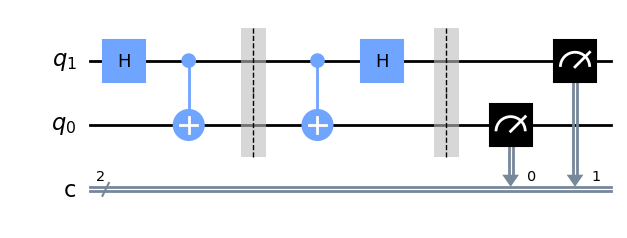

01 --> {'01': 100}


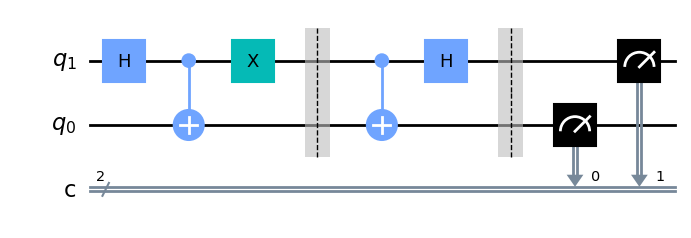

10 --> {'10': 100}


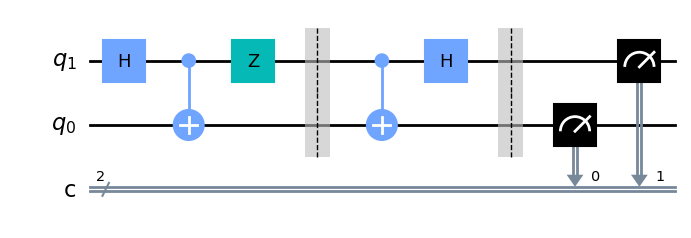

11 --> {'11': 100}


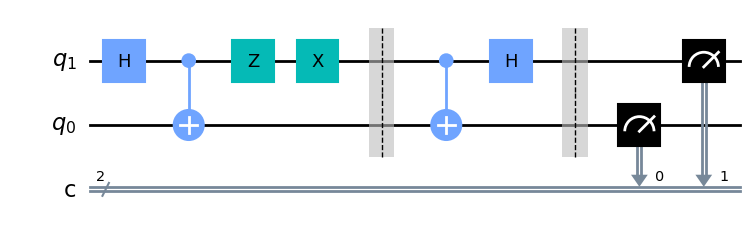

In [3]:
code = ['00','01','10','11']

i = 0 # for the different circuits

for pair in code:

    # quantum curcuit with two qubits: Alice's and Bob's qubits and two bits
    q = QuantumRegister(2, "q") 
    c = ClassicalRegister(2, "c")
    qc = QuantumCircuit(q, c)

    # create entanglement between q[1] and q[0], initialized to |00>
    entangle(q[1], q[0], qc)

    # they are separated from each other now

    # if Alice wants to send '00', then do nothing on her qubit

    # if Alice wants to send '10', then apply z-gate to her qubit
    if pair[0] == '1': 
        qc.z(q[1])

    # if Alice wants to send '01', then apply x-gate (NOT) to her qubit
    if pair[1] == '1': 
        qc.x(q[1])

    # if Alice wants to send '11', then apply ZX with both the conditions above
    
    # Alice sends her qubit to Bob
    qc.barrier()
    
    # BOB DECODING
    # apply cx-gate as CNOT
    qc.cx(q[1],q[0])
    
    # apply h-gate (Hadamard) to Alice's qubit
    qc.h(q[1])
    
    # measure both qubits
    qc.barrier()
    qc.measure(q, c)
    
    # compare the results with pair
    job = execute(qc,Aer.get_backend('qasm_simulator'), shots=100)
    counts = job.result().get_counts(qc)
    print(pair,"-->",counts)
    
    # draw the circuit with bits reversed
    display(qc.draw(output='mpl', reverse_bits=True))
    i = i+1

For each bitstring, we see that the message is decoded correctly for all the 100 shots of the experiment.

## Brief Summary

 - The protocol uses *two qubits* and *two* classical bits.
 - No need for Bob to have knowledge of the state in order to decode it.
 - Classical information is received by physically sending a quantum system.
 - Coding: Transmit two classical bits using one qubit.